In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False},palette='colorblind')

In [30]:
!mv 'ODin_Tube_Map_5M13D.xlsx' data/

In [26]:
data=pd.read_csv('data/5M13D.CSV',header=None).iloc[:,1:]
data.index=data[1]
data=data.drop(1,axis=1)
data.index=data.index.astype(int)/3600000
data.index.name='Time (hrs)'
data=data.dropna(axis=1)
data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
2.777778e-07,944,1023,1128,684,888,1298,1333,1015,1096,656,...,775,736,877,840,941,978,988,922,982,752
3.339556e-02,1621,1620,1650,1610,1629,1637,1605,1626,1585,1577,...,1605,1597,1603,1591,1596,1607,1603,1607,1606,1597
2.022967e-01,1628,1583,1650,1616,1614,1622,1594,1618,1572,1572,...,1607,1590,1613,1604,1602,1616,1601,1618,1593,1591
3.689872e-01,1632,1574,1639,1626,1614,1606,1587,1616,1564,1569,...,1612,1583,1613,1607,1594,1617,1611,1623,1587,1592
5.356811e-01,1626,1558,1626,1626,1602,1581,1566,1609,1551,1563,...,1608,1572,1607,1604,1593,1607,1588,1623,1578,1591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.795626e+02,2493,3220,4648,4363,5944,12327,11870,1476,2304,2374,...,6300,1389,2179,2783,3979,5303,6151,8029,7096,1550
2.797293e+02,2499,3227,4654,4369,5950,12344,11885,1480,2316,2382,...,6309,1395,2184,2789,3989,5310,6158,8037,7105,1556
2.798960e+02,2496,3225,4653,4368,5950,12339,11878,1478,2308,2378,...,6311,1392,2181,2789,3982,5307,6153,8037,7101,1555


In [31]:
layout=pd.read_excel('data/ODin_Tube_Map_5M13D.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A1',
 'A2': 'B1',
 'A3': 'C1',
 'A4': 'D1',
 'A5': 'E1',
 'A6': 'F1',
 'A7': 'G1',
 'A8': 'A9',
 'B1': 'A2',
 'B2': 'B2',
 'B3': 'C2',
 'B4': 'D2',
 'B5': 'E2',
 'B6': 'F2',
 'B7': 'G2',
 'B8': 'B9',
 'C1': 'A3',
 'C2': 'B3',
 'C3': 'C3',
 'C4': 'D3',
 'C5': 'E3',
 'C6': 'F3',
 'C7': 'G3',
 'C8': 'C9',
 'D1': 'A4',
 'D2': 'B4',
 'D3': 'C4',
 'D4': 'D4',
 'D5': 'E4',
 'D6': 'F4',
 'D7': 'G4',
 'D8': 'D9',
 'E1': 'A5',
 'E2': 'B5',
 'E3': 'C5',
 'E4': 'D5',
 'E5': 'E5',
 'E6': 'F5',
 'E7': 'G5',
 'E8': 'E9',
 'F1': 'A6',
 'F2': 'B6',
 'F3': 'C6',
 'F4': 'D6',
 'F5': 'E6',
 'F6': 'F6',
 'F7': 'G6',
 'F8': 'F9',
 'G1': 'A7',
 'G2': 'B7',
 'G3': 'C7',
 'G4': 'D7',
 'G5': 'E7',
 'G6': 'F7',
 'G7': 'G7',
 'G8': 'G9',
 'H1': 'A8',
 'H2': 'B8',
 'H3': 'C8',
 'H4': 'D8',
 'H5': 'E8',
 'H6': 'F8',
 'H7': 'G8'}

In [33]:
ODs=pd.read_excel('data/ODin_Tube_Map_5M13D.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2
Condition,,
A1,0.015,0.072
A2,0.011,0.064
A3,0.015,0.071
A4,0.011,0.064
A5,0.016,0.071
...,...,...
G6,0.013,0.402
G7,0.015,0.424
G8,0.013,0.410


In [34]:
media=pd.read_excel('data/ODin_Tube_Map_5M13D.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '1 mM Nitrate',
 'B': '2 mM Nitrate',
 'C': '4 mM Nitrate',
 'D': '8 mM Nitrate',
 'E': '10 mM Nitrate',
 'F': '20 mM Nitrate',
 'G': '40 mM Nitrate'}

In [35]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '1 mM Nitrate,Rep1',
 'A2': '2 mM Nitrate,Rep1',
 'A3': '4 mM Nitrate,Rep1',
 'A4': '8 mM Nitrate,Rep1',
 'A5': '10 mM Nitrate,Rep1',
 'A6': '20 mM Nitrate,Rep1',
 'A7': '40 mM Nitrate,Rep1',
 'A8': '1 mM Nitrate,Rep9',
 'B1': '1 mM Nitrate,Rep2',
 'B2': '2 mM Nitrate,Rep2',
 'B3': '4 mM Nitrate,Rep2',
 'B4': '8 mM Nitrate,Rep2',
 'B5': '10 mM Nitrate,Rep2',
 'B6': '20 mM Nitrate,Rep2',
 'B7': '40 mM Nitrate,Rep2',
 'B8': '2 mM Nitrate,Rep9',
 'C1': '1 mM Nitrate,Rep3',
 'C2': '2 mM Nitrate,Rep3',
 'C3': '4 mM Nitrate,Rep3',
 'C4': '8 mM Nitrate,Rep3',
 'C5': '10 mM Nitrate,Rep3',
 'C6': '20 mM Nitrate,Rep3',
 'C7': '40 mM Nitrate,Rep3',
 'C8': '4 mM Nitrate,Rep9',
 'D1': '1 mM Nitrate,Rep4',
 'D2': '2 mM Nitrate,Rep4',
 'D3': '4 mM Nitrate,Rep4',
 'D4': '8 mM Nitrate,Rep4',
 'D5': '10 mM Nitrate,Rep4',
 'D6': '20 mM Nitrate,Rep4',
 'D7': '40 mM Nitrate,Rep4',
 'D8': '8 mM Nitrate,Rep9',
 'E1': '1 mM Nitrate,Rep5',
 'E2': '2 mM Nitrate,Rep5',
 'E3': '4 mM Nitrate,Rep5',
 'E4': '

Text(0, 0.5, 'Nitrous oxide (ppm)')

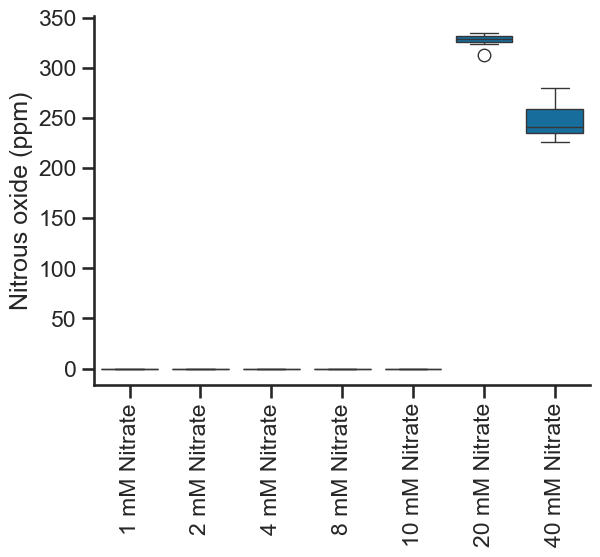

In [37]:
n2o= pd.read_csv('data/20230906-Nitrous-Oxide.csv').iloc[:,:3].dropna()
n2o['condition']=[x[0] for x in n2o['Sample Name']]
n2o['Rep']=[x[1] if x[1] != '9' else np.nan for x in n2o['Sample Name']]
n2o=n2o.dropna()
n2o['condition']=n2o['condition'].map(media_dict)
n2o['Nitrous Oxide']=n2o['Nitrous Oxide'].astype(float)
sns.boxplot(x='condition',y='Nitrous Oxide',data=n2o)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Nitrous oxide (ppm)')

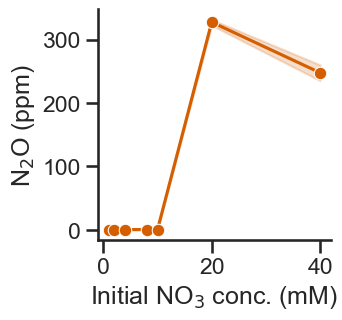

In [10]:
colors=sns.color_palette('colorblind')
n2o['nitrate']=[int(x.split()[0]) for x in n2o.condition]
plt.figure(figsize=(3,3))
sns.lineplot(x='nitrate',y='Nitrous Oxide',data=n2o,marker='o',color=colors[3])
plt.xlabel('Initial NO$_3$ conc. (mM)')
plt.ylabel('N$_2$O (ppm)')
#plt.xticks([0,25,50,75,100])
plt.yticks([0,100,200,300])
#plt.savefig('nitrate-N2O.pdf',bbox_inches='tight')

In [11]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

,Time (hrs),Layout,mA,Condition
0,2.777778e-07,A1,944,"1 mM Nitrate,Rep1"
1,2.777778e-07,A2,1023,"2 mM Nitrate,Rep1"
2,2.777778e-07,A3,1128,"4 mM Nitrate,Rep1"
3,2.777778e-07,A4,684,"8 mM Nitrate,Rep1"
4,2.777778e-07,A5,888,"10 mM Nitrate,Rep1"
...,...,...,...,...
107707,2.802294e+02,H4,5303,"8 mM Nitrate,Rep8"
107708,2.802294e+02,H5,6143,"10 mM Nitrate,Rep8"
107709,2.802294e+02,H6,8033,"20 mM Nitrate,Rep8"
107710,2.802294e+02,H7,7097,"40 mM Nitrate,Rep8"


In [12]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

mapped['OD1']=np.nan
mapped['OD2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2
0,2.777778e-07,A1,944,"1 mM Nitrate,Rep1",0.015,0.072
1,2.777778e-07,A2,1023,"2 mM Nitrate,Rep1",0.013,0.103
2,2.777778e-07,A3,1128,"4 mM Nitrate,Rep1",0.014,0.153
3,2.777778e-07,A4,684,"8 mM Nitrate,Rep1",0.014,0.254
4,2.777778e-07,A5,888,"10 mM Nitrate,Rep1",0.016,0.338
...,...,...,...,...,...,...
107707,2.802294e+02,H4,5303,"8 mM Nitrate,Rep8",0.014,0.257
107708,2.802294e+02,H5,6143,"10 mM Nitrate,Rep8",0.014,0.333
107709,2.802294e+02,H6,8033,"20 mM Nitrate,Rep8",0.012,0.432
107710,2.802294e+02,H7,7097,"40 mM Nitrate,Rep8",0.013,0.410


In [13]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2,media,replicate
0,2.777778e-07,A1,944,"1 mM Nitrate,Rep1",0.015,0.072,1 mM Nitrate,1
1,2.777778e-07,A2,1023,"2 mM Nitrate,Rep1",0.013,0.103,2 mM Nitrate,1
2,2.777778e-07,A3,1128,"4 mM Nitrate,Rep1",0.014,0.153,4 mM Nitrate,1
3,2.777778e-07,A4,684,"8 mM Nitrate,Rep1",0.014,0.254,8 mM Nitrate,1
4,2.777778e-07,A5,888,"10 mM Nitrate,Rep1",0.016,0.338,10 mM Nitrate,1
...,...,...,...,...,...,...,...,...
107707,2.802294e+02,H4,5303,"8 mM Nitrate,Rep8",0.014,0.257,8 mM Nitrate,8
107708,2.802294e+02,H5,6143,"10 mM Nitrate,Rep8",0.014,0.333,10 mM Nitrate,8
107709,2.802294e+02,H6,8033,"20 mM Nitrate,Rep8",0.012,0.432,20 mM Nitrate,8
107710,2.802294e+02,H7,7097,"40 mM Nitrate,Rep8",0.013,0.410,40 mM Nitrate,8


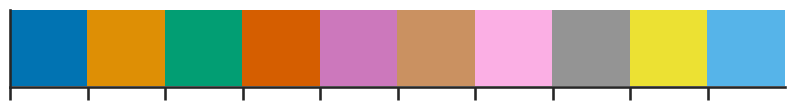

In [14]:
colors=sns.color_palette('colorblind')
sns.palplot(colors)

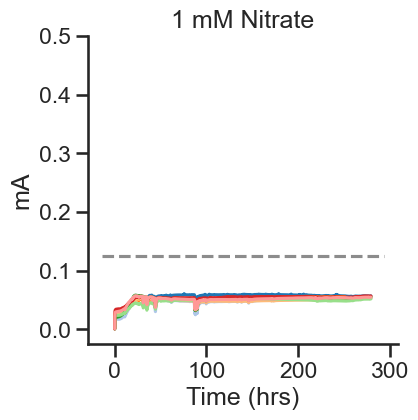

<Figure size 640x480 with 0 Axes>

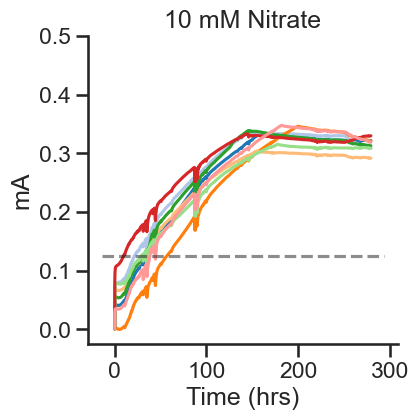

<Figure size 640x480 with 0 Axes>

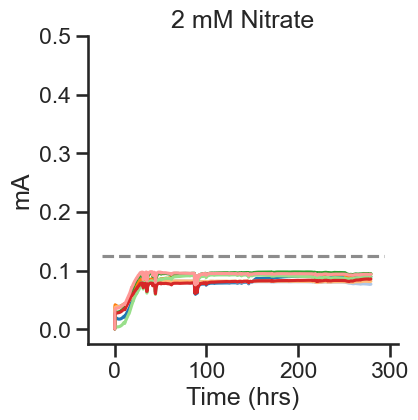

<Figure size 640x480 with 0 Axes>

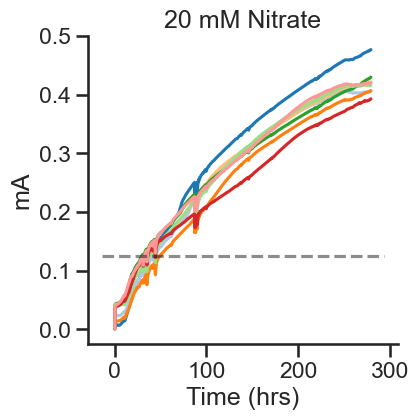

<Figure size 640x480 with 0 Axes>

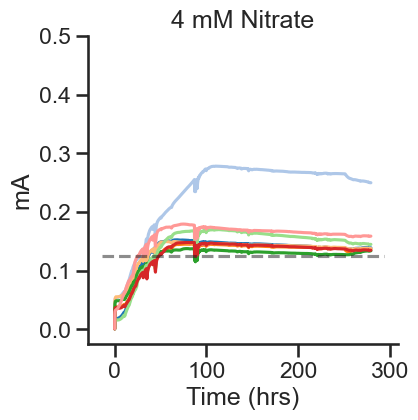

<Figure size 640x480 with 0 Axes>

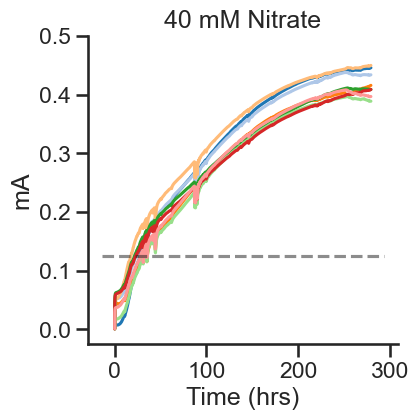

<Figure size 640x480 with 0 Axes>

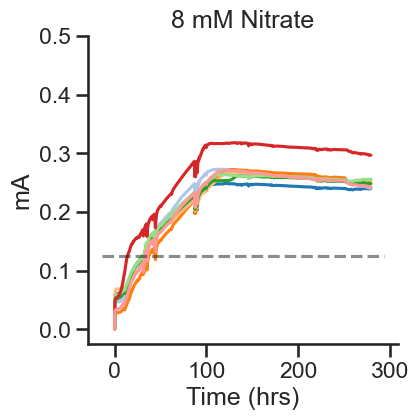

<Figure size 640x480 with 0 Axes>

In [15]:
from scipy.stats import linregress
colors=sns.color_palette('tab20',12)
lags={}
maxOD={}
for media,df in mapped.groupby(by='media'):
    if media =='Empty':
        break
    plt.figure(figsize=(4,4))
    plt.title(media)
    lags[media]=[]
    maxOD[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 10).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3=y3-y3[0]
        y3[y3<=0]=0.001
        if len(x2[y3>.125]) > 0:
            lag=x2[y3>.125][0]
        else:
            lag=x2[-1]
        lags[media].append(lag)
        maxOD[media].append(y3.max())
        #y2=y2/y2.max()
        plt.plot(x2,y3,color=colors[i])
        i+=1
    plt.xlabel('Time (hrs)')
    plt.ylabel('mA')
    plt.ylim(-.025,.5)
    plt.plot(plt.xlim(),(.125,.125),'k--',alpha=0.5)
    plt.show()
    plt.clf()

Text(0, 0.5, 'Lag Standard Dev (hrs)')

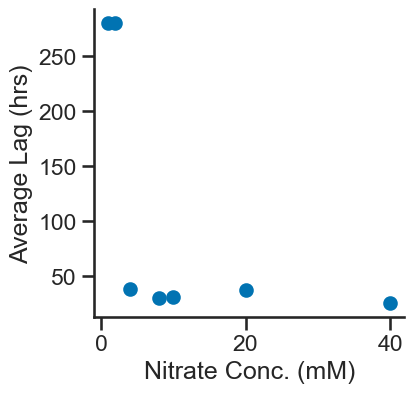

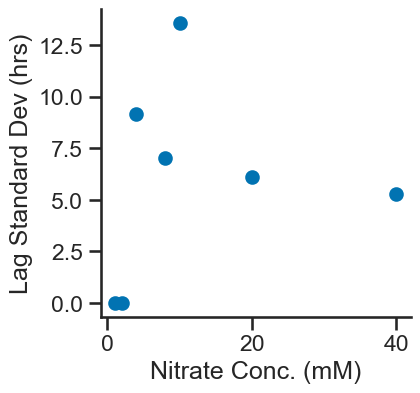

In [16]:
df=pd.DataFrame(lags)
mean=df.mean().reset_index()
mean['conc']=[float(x.split()[0]) for x in mean['index']]
mean.columns=['cond','lag','conc']
plt.figure(figsize=(4,4))
plt.scatter(mean.conc,mean.lag)
plt.xlabel('Nitrate Conc. (mM)')
plt.ylabel('Average Lag (hrs)')


var=df.std().reset_index()
var['conc']=[float(x.split()[0]) for x in var['index']]
var.columns=['cond','lag','conc']
plt.figure(figsize=(4,4))
plt.scatter(var.conc,var.lag)
plt.xlabel('Nitrate Conc. (mM)')
plt.ylabel('Lag Standard Dev (hrs)')

Text(0, 0.5, 'Average Lag (hrs)')

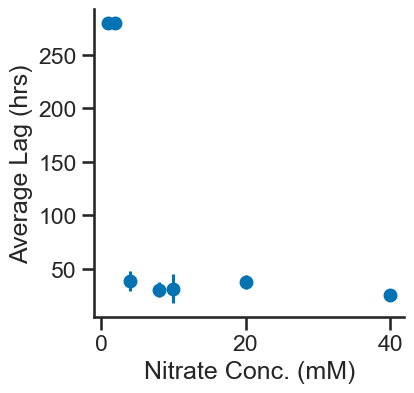

In [17]:
plt.figure(figsize=(4,4))
plt.errorbar(mean.conc,mean.lag,var.lag,ls='none',marker='o')
plt.xlabel('Nitrate Conc. (mM)')
plt.ylabel('Average Lag (hrs)')


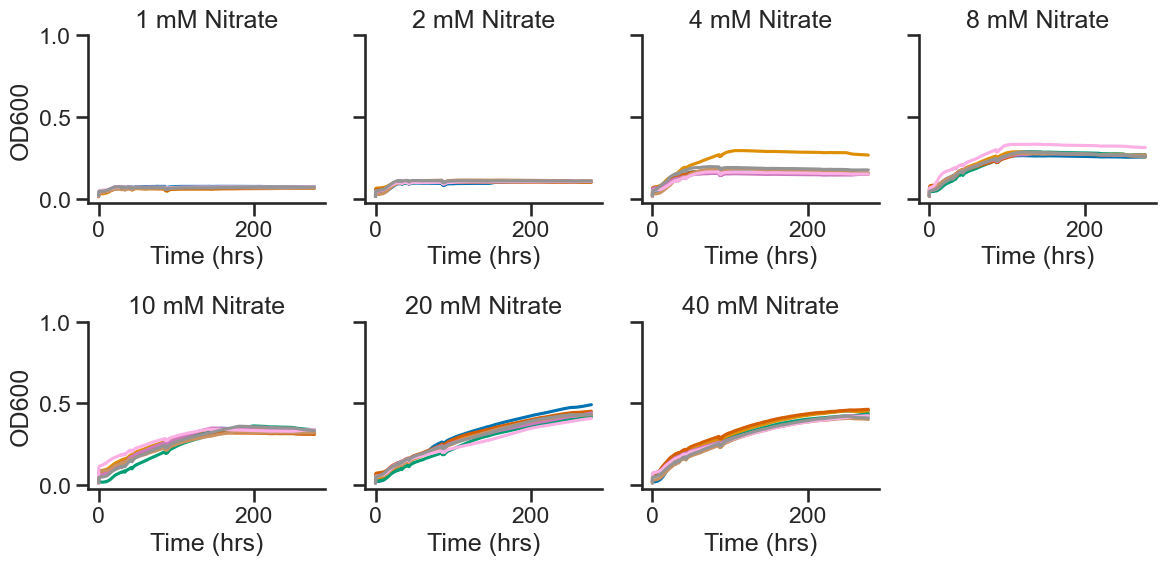

In [18]:
colors=sns.color_palette('colorblind',9)
maxOD={}
fig= plt.figure(figsize=(12,6))
trash=[('5 mM Nitrite', '4')]
j=1
res=pd.DataFrame()
for media in ['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']:
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,4,j)
    ax.set_title(media)
    #lags[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9' or (media,rep) in trash:
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        
        ax.plot(x2,y3,color=colors[i])
        i+=1

     
        od=pd.DataFrame([x2,y3]).T
        od.columns=['Time (hrs)','OD600']
        od['media']=media
        od['replicate']=rep
        res=pd.concat([res,od])
    plt.ylim(-.025,1)
    if j != 1 and j != 5:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    
plt.tight_layout()
#plt.savefig('SynCom-ODin-OD600.png',dpi=250,bbox_inches='tight')

,Time (hrs),OD600,media,replicate
1078,177.554191,0.075016,1 mM Nitrate,1
183,28.373547,0.064953,1 mM Nitrate,2
1289,212.723746,0.071427,1 mM Nitrate,3
1664,275.228967,0.064031,1 mM Nitrate,4
159,24.372918,0.073375,1 mM Nitrate,5
949,156.052355,0.065599,1 mM Nitrate,6
1664,275.228967,0.072136,1 mM Nitrate,7
150,22.872729,0.071568,1 mM Nitrate,8
958,157.552488,0.347793,10 mM Nitrate,1
958,157.552488,0.343844,10 mM Nitrate,2


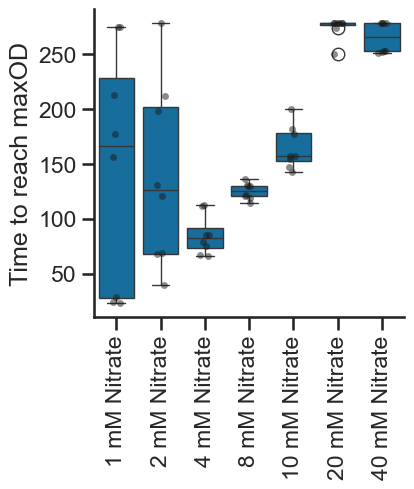

In [20]:
maxOD=pd.DataFrame()
for idx,df in res.groupby(by=['media','replicate']):
    tmp=df[df.OD600==df.OD600.max()]
    maxOD=pd.concat([maxOD,tmp])
plt.figure(figsize=(4,4))
sns.boxplot(x='media',y='Time (hrs)',data=maxOD,order=['1 mM Nitrate',  '2 mM Nitrate', 
       '4 mM Nitrate', '8 mM Nitrate','10 mM Nitrate','20 mM Nitrate','40 mM Nitrate'])
sns.stripplot(x='media',y='Time (hrs)',data=maxOD,color='k',alpha=0.5,order=['1 mM Nitrate',  '2 mM Nitrate', 
       '4 mM Nitrate', '8 mM Nitrate','10 mM Nitrate','20 mM Nitrate','40 mM Nitrate'])
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Time to reach maxOD')
maxOD


Text(0, 0.5, 'maxOD')

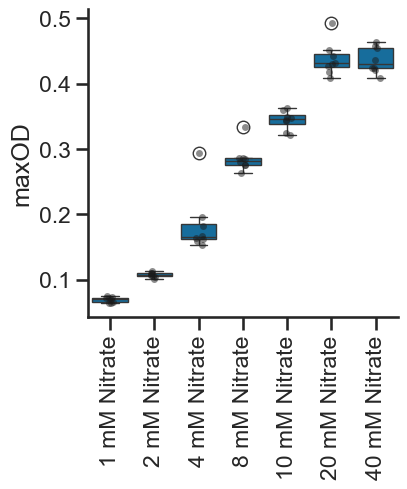

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(x='media',y='OD600',data=maxOD,order=['1 mM Nitrate',  '2 mM Nitrate', 
       '4 mM Nitrate', '8 mM Nitrate','10 mM Nitrate','20 mM Nitrate','40 mM Nitrate'])
sns.stripplot(x='media',y='OD600',data=maxOD,color='k',alpha=0.5,order=['1 mM Nitrate',  '2 mM Nitrate', 
       '4 mM Nitrate', '8 mM Nitrate','10 mM Nitrate','20 mM Nitrate','40 mM Nitrate'])

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('maxOD')
#plt.ylim(0.2,0.4)

<Axes: xlabel='nitrate', ylabel='OD600'>

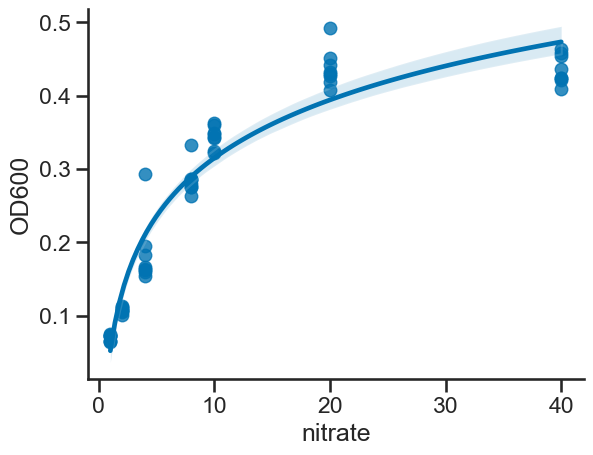

In [22]:
maxOD['nitrate']=[int(x.split()[0]) for x in maxOD.media]
sns.regplot(x='nitrate',y='OD600',data=maxOD,logx=True)

(-0.01, 0.5)

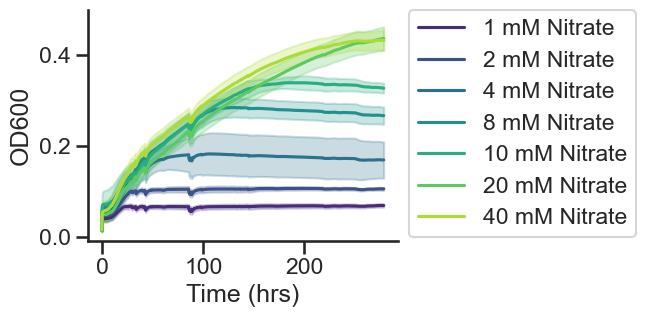

In [23]:
res.replicate=res.replicate.astype(int)
mean=res.groupby(by=['media','Time (hrs)']).mean()
std=res.groupby(by=['media','Time (hrs)']).std()
conditions=['1 mM Nitrate',  '2 mM Nitrate', 
       '4 mM Nitrate', '8 mM Nitrate','10 mM Nitrate','20 mM Nitrate','40 mM Nitrate']
colors=sns.color_palette('viridis',len(conditions))
plt.figure(figsize=(4,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.25,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)
#plt.savefig('SynCom-Nitrate-Yield.png',dpi=500,bbox_inches='tight')
#plt.savefig('SynCom-Nitrate-Yield.pdf',bbox_inches='tight')
#plt.yscale('log')
#plt.xlim(0,250)
plt.ylim(-.01,0.5)
#plt.ylim(10**-3,2*10**-1)